# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here

In [2]:
import numpy as np
import pandas as pd

from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [9]:
# your answer here
temp = pd.read_csv("Temp_States.csv",encoding = "ISO-8859-1")

#### Print `temp`

In [10]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [14]:
# your answer here

In [12]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


In [13]:
temp.describe()

,Temperature
count,7.000000
mean,15.158730
std,6.695265
min,3.333333
25%,11.944444
50%,17.222222
75%,19.722222
max,22.222222


In [16]:
'''
It gives info about the shape of the df, (7,3), 
The data is valid for analysis, it does not contain null values, and the current types of data can be easily modified to convert the 'object' types into 'categorical' if needed. 

'''

"\nIt gives info about the shape of the df, (7,3), \nThe data is valid for analysis, it does not contain null values, and the current types of data can be easily modified to convert the 'object' types into 'categorical' if needed. \n\n"

#### Select the rows where state is New York

In [3]:
# your answer here

In [22]:
temp.loc[temp["State"] =="New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [25]:
# your answer here
temp[temp['State']=='New York']['Temperature'].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [29]:
# your answer here
t1 = temp.loc[temp["Temperature"] > 15, ["City", "State"]]

#### Now, return only the cities that have a temperature above 15 degress Celcius

In [34]:
# your answer here
t2 = t1.City
t2

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [43]:
# your answer here
temp[(temp.Temperature > 15) & (temp.Temperature < 20)]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [51]:
# your answer here
t3 = temp.groupby("State").mean('Temperature')

In [54]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [55]:
# your answer here
employee = pd.read_csv("Employee.csv",encoding = "ISO-8859-1")

#### Explore the data types of the Temp dataframe. Comment your results

In [57]:
# your answer here
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


In [58]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


In [59]:
emp = employee.copy()

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<AxesSubplot:ylabel='Count'>

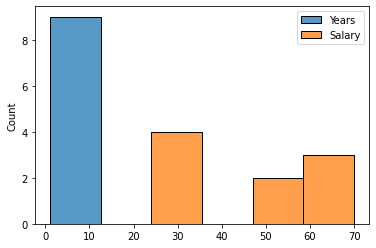

In [64]:
# your answer here
sns.histplot(emp)

#### What's the average salary in this company?

In [61]:
# your answer here
emp.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [62]:
# your answer here
emp.Salary.max()

70

#### What's the lowest salary?

In [63]:
# your answer here
emp.Salary.min()

30

#### Who are the employees with the lowest salary?

In [69]:
# your answer here
emp.nsmallest(2,"Salary")

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [70]:
# your answer here
david = emp[emp["Name"]=="David", ]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [80]:
# your answer here
david_sal= emp.loc[emp["Name"] == "David", ["Salary"]]
david_sal

,Salary
2,30


#### Print all the rows where job title is associate

In [83]:
# your answer here
emp.loc[emp["Title"] =="associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [86]:
# your answer here- 1 method
print(emp[:3])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


In [87]:
# your answer here- 2nd method
print(emp.head(3))

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Find the employees who's title is associate and the salary above 55?

In [88]:
# your answer here
# your answer here
emp[(emp['Title'] == 'associate') & (emp['Salary'] > 55)] 
     

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [90]:
# your answer here
emp.groupby('Years').mean('Salary')

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [92]:
# your answer here
emp.groupby('Title').mean('Salary')

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:xlabel='Salary', ylabel='Years'>

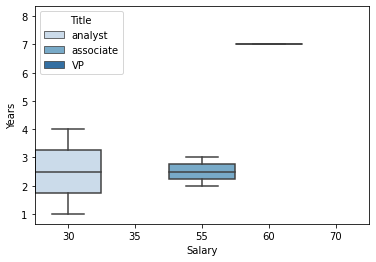

In [98]:
# draw boxplot here
sns.boxplot(y='Years', x='Salary', 
            data=emp, 
            hue='Title',
            width=3,
            palette="Blues")

In [102]:
# print first quartile here
emp.Salary.quantile(0.25)

35.0

In [103]:
# print third quartile here
emp.Salary.quantile(0.75)

60.0

#### Is the mean salary per gender different?

In [105]:
# your answer here
emp3 = emp.groupby("Gender").mean('Salary')
emp3

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [107]:
# your answer here
emp.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here
employee.groupby("Gender").mean()["Salary"]
employee.groupby('Gender')['Salary'].apply(lambda s : s.max() - s.min() )
employee.groupby("Department").Salary.agg(["min" , "max"])

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [3]:
# your answer here
import zipfile
zppp = zipfile.ZipFile('Orders.zip')
orders = pd.read_csv(zppp.open('Orders.csv'))
zppp.close()

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [4]:
# your answer here
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [5]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [7]:
# your answer here

####  What is the average Purchase Price?

In [8]:
# your answer here
mean_spent = orders.amount_spent.mean()
print(mean_spent)

22.394748504739596


#### What were the highest and lowest purchase prices? 

In [9]:
# your answer here
min_spent = orders.amount_spent.min()
max_spent = orders.amount_spent.max()

In [10]:
# your answer here
print(min_spent, max_spent)

0.0 168469.6


#### Select all the customers we have in Spain

In [16]:
# your answer here
orders[orders["Country"] == "Spain"].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [18]:
# your answer here
num_cust = orders["Country"] == "Spain"
num_cust.value_counts()

False    395439
True       2485
Name: Country, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [19]:
# your answer here
orders[orders["amount_spent"]>50].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
9,9,536367,84879,2010,12,3,8,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08
26,26,536370,22728,2010,12,3,8,alarm clock bakelike pink,24,2010-12-01 08:45:00,3.75,12583,France,90.00
27,27,536370,22727,2010,12,3,8,alarm clock bakelike red,24,2010-12-01 08:45:00,3.75,12583,France,90.00


#### Select orders from Spain that are above 50 items

In [59]:
# your answer here
orders[(orders["amount_spent"]>50) & (orders["Country"] == "Spain")]


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358154,485499,577606,POST,2011,11,1,9,postage,3,2011-11-21 09:11:00,28.00,12462,Spain,84.0
366326,495739,578321,20728,2011,11,3,16,lunch bag cars blue,200,2011-11-23 16:59:00,1.45,12557,Spain,290.0
366327,495740,578321,84997B,2011,11,3,16,childrens cutlery retrospot red,72,2011-11-23 16:59:00,3.75,12557,Spain,270.0
366328,495741,578321,84997D,2011,11,3,16,childrens cutlery polkadot pink,360,2011-11-23 16:59:00,3.75,12557,Spain,1350.0


#### Select all free orders

In [21]:
# your answer here
orders[orders["amount_spent"] == 0].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [26]:
# your answer here
named = orders[orders["Description"].str.contains("lunch bag")]
named.head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [30]:
# your answer here
named[named['year']==2011].head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.3


#### Show the frequency distribution of the amount spent in Spain.

In [74]:
#esp_ =orders[orders["Country"]== "Spain"]
esp_2 =orders[orders["Country"]== "Spain"]
esp_2.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000
mean,260199.780684,559087.911871,2010.969819,6.724346,3.595171,12.844668,11.247887,3.824684,12909.567404,24.779521
std,150169.518789,13014.805345,0.171120,3.643878,1.853832,2.307486,22.829122,5.223690,1276.674122,70.336782
min,6421.000000,536944.000000,2010.000000,1.000000,1.000000,8.000000,1.000000,0.000000,12354.000000,0.000000
25%,121394.000000,546760.000000,2011.000000,3.000000,2.000000,11.000000,3.000000,1.250000,12484.000000,9.950000
50%,258663.000000,559665.000000,2011.000000,8.000000,4.000000,13.000000,6.000000,2.080000,12540.000000,15.000000
75%,404019.000000,571665.000000,2011.000000,10.000000,5.000000,14.000000,12.000000,4.150000,12550.000000,19.800000
max,535275.000000,581193.000000,2011.000000,12.000000,7.000000,18.000000,360.000000,65.000000,17097.000000,1350.000000


<AxesSubplot:xlabel='amount_spent'>

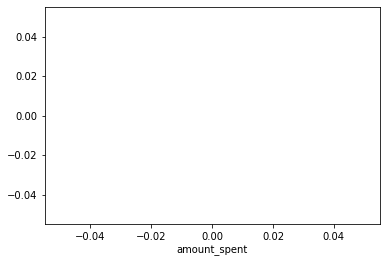

In [82]:
# your answer here
sns.scatterplot(data=esp_2, x="amount_spent")

#### Select all orders made in the month of August

In [27]:
# your answer here
orders[orders["month"] == 8]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [50]:
# your answer here
res1 = orders[orders['month']==8]     
res1.groupby("Country").sum()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
Country,,,,,,,,,,
Australia,32576265,60302348,215177,856,438,916,12570,242.98,1328565,22489.20
Austria,26212020,49543386,176968,704,208,880,790,279.71,1116970,1516.08
Belgium,58480484,109287235,390134,1552,739,2448,2069,726.14,2406584,3554.02
Canada,1564810,2822140,10055,40,20,55,52,4.99,89220,51.56
Channel Islands,43046490,78948531,281540,1120,287,1570,2009,626.19,2089177,4896.78
Denmark,4739080,9005648,32176,128,48,160,338,42.89,222704,213.15
EIRE,177784872,333975511,1192523,4744,2423,8087,9331,2123.92,8654983,16967.38
Finland,18366395,34362298,122671,488,264,618,693,283.84,768320,1376.50
France,174350986,320802556,1144259,4552,2200,6641,7958,1813.53,7191464,13810.96


In [45]:
res

Country
Australia                  7184
Austria                    3034
Bahrain                      85
Belgium                   15039
Brazil                      128
Canada                      963
Channel Islands            5080
Cyprus                     4489
Czech Republic              130
Denmark                    3004
EIRE                      55928
European Community          367
Finland                    4595
France                    62542
Germany                   66066
Greece                      822
Iceland                    1383
Israel                     1929
Italy                      5685
Japan                      2099
Lebanon                      45
Lithuania                   420
Malta                       842
Netherlands               15928
Norway                     9759
Poland                     2156
Portugal                  11406
RSA                         580
Saudi Arabia                 18
Singapore                  1149
Spain                     16710


#### What's the  average amount of money spent by country

In [31]:
# your answer here
orders.groupby('Country')['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [42]:
# your answer here
exp = orders.loc[orders.UnitPrice.idxmax(), 'Description']
print(exp)

postage


#### What was the average amount spent per year ?

In [43]:
# your answer here
orders.groupby('year')['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64